# Import Libraries

In [1]:
# general libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

# hugging face libraries
from datasets import load_dataset

# scikit-learn libraries
from sklearn.metrics import (
    roc_curve, 
    auc,
    roc_auc_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix
)

In [2]:
import sys
sys.path.append('../')

from model_test import model_test

# Load Dataset

In [3]:
path = os.path.abspath('../../datasets/HAM10000/split')

In [4]:
# load dataset
dataset = load_dataset(path)

Resolving data files:   0%|          | 0/9187 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/828 [00:00<?, ?it/s]

Found cached dataset imagefolder (C:/Users/Mominul Islam/.cache/huggingface/datasets/imagefolder/split-40b745d09ac44f74/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 9187
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 828
    })
})

In [6]:
# num of test samples
print('Test Samples: ', dataset['test'].num_rows)

Test Samples:  828


In [7]:
# num of features
dataset['test'].features['label']

ClassLabel(names=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], id=None)

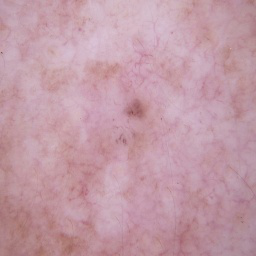

In [8]:
# show image
dataset['test'][42]['image']

In [9]:
# show label
dataset['test'][42]['label']

1

# Load Models

In [10]:
# load models
st_model = os.path.abspath('../../models/HAM10000/Swin-Transformer/ham10000-swin-no-filtering')
st_model_FBGT_alpha_1 = os.path.abspath('../../models/HAM10000/Swin-Transformer/ham10000-swin-fbgt-alpha-1')
st_model_FBGT_alpha_2 = os.path.abspath('../../models/HAM10000/Swin-Transformer/ham10000-swin-fbgt-alpha-2')
st_model_FBGT_alpha_3 = os.path.abspath('../../models/HAM10000/Swin-Transformer/ham10000-swin-fbgt-alpha-3')
st_model_FAGT_alpha_1 = os.path.abspath('../../models/HAM10000/Swin-Transformer/ham10000-swin-fagt-alpha-1')
st_model_FAGT_alpha_2 = os.path.abspath('../../models/HAM10000/Swin-Transformer/ham10000-swin-fagt-alpha-2')
st_model_FAGT_alpha_3 = os.path.abspath('../../models/HAM10000/Swin-Transformer/ham10000-swin-fagt-alpha-3')

vit_model = os.path.abspath('../../models/HAM10000/ViT/ham10000-vit-no-filtering')
vit_model_FBGT_alpha_1 = os.path.abspath('../../models/HAM10000/ViT/ham10000-vit-fbgt-alpha-1')
vit_model_FAGT_alpha_3 = os.path.abspath('../../models/HAM10000/ViT/ham10000-vit-fagt-alpha-3')

convnext_model = os.path.abspath('../../models/HAM10000/ConvNeXt/ham10000-convnext-no-filtering')
convnext_model_FBGT_alpha_1 = os.path.abspath('../../models/HAM10000/ConvNeXt/ham10000-convnext-fbgt-alpha-1')
convnext_model_FAGT_alpha_3 = os.path.abspath('../../models/HAM10000/ConvNeXt/ham10000-convnext-fagt-alpha-3')

In [11]:
# predictions 
print('Swin Transformer + No-Filtering')
st_pred = model_test(st_model, dataset)

print('Swin Transformer + FBGT (α=0.80)')
st_pred_FBGT_alpha_1 = model_test(st_model_FBGT_alpha_1, dataset)
print('Swin Transformer + FBGT (α=0.85)')
st_pred_FBGT_alpha_2 = model_test(st_model_FBGT_alpha_2, dataset)
print('Swin Transformer + FBGT (α=0.90)')
st_pred_FBGT_alpha_3 = model_test(st_model_FBGT_alpha_3, dataset)

print('Swin Transformer + FAGT (α=0.75)')
st_pred_FAGT_alpha_1 = model_test(st_model_FAGT_alpha_1, dataset)
print('Swin Transformer + FAGT (α=0.80)')
st_pred_FAGT_alpha_2 = model_test(st_model_FAGT_alpha_2, dataset)
print('Swin Transformer + FAGT (α=0.85)')
st_pred_FAGT_alpha_3 = model_test(st_model_FAGT_alpha_3, dataset)

Swin Transformer + No-Filtering


C:\Anaconda\anaconda3\envs\csf-model\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Swin Transformer + FBGT (α=0.80)


Swin Transformer + FBGT (α=0.85)


Swin Transformer + FBGT (α=0.90)


Swin Transformer + FAGT (α=0.75)


Swin Transformer + FAGT (α=0.80)


Swin Transformer + FAGT (α=0.85)


In [12]:
print('ViT + No-Filtering')
vit_pred = model_test(vit_model, dataset)
print('ViT + FBGT (α=0.80)')
vit_pred_FBGT_alpha_1 = model_test(vit_model_FBGT_alpha_1, dataset)
print('vit + FAGT (α=0.85)')
vit_pred_FAGT_alpha_3 = model_test(vit_model_FAGT_alpha_3, dataset)

ViT + No-Filtering


ViT + FBGT (α=0.80)


vit + FAGT (α=0.85)


In [13]:
print('ConvNeXt + No-Filtering')
convnext_pred = model_test(convnext_model, dataset)
print('ConvNeXt + FBGT (α=0.80)')
convnext_pred_FBGT_alpha_1 = model_test(convnext_model_FBGT_alpha_1, dataset)
print('ConvNeXt + FAGT (α=0.85)')
convnext_pred_FAGT_alpha_3 = model_test(convnext_model_FAGT_alpha_3, dataset)

ConvNeXt + No-Filtering


C:\Anaconda\anaconda3\envs\csf-model\lib\site-packages\transformers\models\convnext\feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


ConvNeXt + FBGT (α=0.80)


ConvNeXt + FAGT (α=0.85)


In [14]:
def to_categorical(y, num_classes):
    """ 1-hot encoding """
    return np.eye(num_classes, dtype='uint8')[y]

def test_set_gt(test_set):
    y = []
    for i in range(test_set.num_rows):
        y.append(test_set[i]['label'])
    return np.array(y)

In [15]:
############## true ##############
# y_true_flat
y_true_flat = test_set_gt(dataset['test'])

# y_true
y_true = to_categorical(y_true_flat, 7)

############## predicted ##############
# y_pred_flat
y_pred_flat_st = np.argmax(st_pred, axis=-1)
y_pred_flat_st_FBGT_alpha_1 = np.argmax(st_pred_FBGT_alpha_1, axis=-1)
y_pred_flat_st_FBGT_alpha_2 = np.argmax(st_pred_FBGT_alpha_2, axis=-1)
y_pred_flat_st_FBGT_alpha_3 = np.argmax(st_pred_FBGT_alpha_3, axis=-1)
y_pred_flat_st_FAGT_alpha_1 = np.argmax(st_pred_FAGT_alpha_1, axis=-1)
y_pred_flat_st_FAGT_alpha_2 = np.argmax(st_pred_FAGT_alpha_2, axis=-1)
y_pred_flat_st_FAGT_alpha_3 = np.argmax(st_pred_FAGT_alpha_3, axis=-1)

y_pred_flat_vit = np.argmax(vit_pred, axis=-1)
y_pred_flat_vit_FBGT_alpha_1 = np.argmax(vit_pred_FBGT_alpha_1, axis=-1)
y_pred_flat_vit_FAGT_alpha_3 = np.argmax(vit_pred_FAGT_alpha_3, axis=-1)

y_pred_flat_convnext = np.argmax(convnext_pred, axis=-1)
y_pred_flat_convnext_FBGT_alpha_1 = np.argmax(convnext_pred_FBGT_alpha_1, axis=-1)
y_pred_flat_convnext_FAGT_alpha_3 = np.argmax(convnext_pred_FAGT_alpha_3, axis=-1)

# y_pred
y_pred_st = st_pred
y_pred_st_FBGT_alpha_1 = st_pred_FBGT_alpha_1
y_pred_st_FBGT_alpha_2 = st_pred_FBGT_alpha_2
y_pred_st_FBGT_alpha_3 = st_pred_FBGT_alpha_3
y_pred_st_FAGT_alpha_1 = st_pred_FAGT_alpha_1
y_pred_st_FAGT_alpha_2 = st_pred_FAGT_alpha_2
y_pred_st_FAGT_alpha_3 = st_pred_FAGT_alpha_3

y_pred_vit = vit_pred
y_pred_vit_FBGT_alpha_1 = vit_pred_FBGT_alpha_1
y_pred_vit_FAGT_alpha_3 = vit_pred_FAGT_alpha_3

y_pred_convnext = convnext_pred
y_pred_convnext_FBGT_alpha_1 = convnext_pred_FBGT_alpha_1
y_pred_convnext_FAGT_alpha_3 = convnext_pred_FAGT_alpha_3

# Recall (Macro Average)

In [16]:
print("Swin T. | Recall | No-Filtering: ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_st, average='macro')*100))
print("")
print("Swin T. | Recall | FBGT (α=0.80): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_st_FBGT_alpha_1, average='macro')*100))
print("Swin T. | Recall | FBGT (α=0.85): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_st_FBGT_alpha_2, average='macro')*100))
print("Swin T. | Recall | FBGT (α=0.90): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_st_FBGT_alpha_3, average='macro')*100))
print("")
print("Swin T. | Recall | FAGT (α=0.75): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_st_FAGT_alpha_1, average='macro')*100))
print("Swin T. | Recall | FAGT (α=0.80): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_st_FAGT_alpha_2, average='macro')*100))
print("Swin T. | Recall | FAGT (α=0.85): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_st_FAGT_alpha_3, average='macro')*100))
print("")

print("ViT | Recall | No-Filtering: ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_vit, average='macro')*100))
print("ViT | Recall | FBGT (α=0.80): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_vit_FBGT_alpha_1, average='macro')*100))
print("ViT | Recall | FAGT (α=0.85): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_vit_FAGT_alpha_3, average='macro')*100))
print("")

print("ConvNeXt | Recall | No-Filtering: ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_convnext, average='macro')*100))
print("ConvNeXt | Recall | FBGT (α=0.80): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_convnext_FBGT_alpha_1, average='macro')*100))
print("ConvNeXt | Recall | FAGT (α=0.85): ", '{0:.2f}%'.format(recall_score(y_true_flat, y_pred_flat_convnext_FAGT_alpha_3, average='macro')*100))

Swin T. | Recall | No-Filtering:  78.13%

Swin T. | Recall | FBGT (α=0.80):  81.82%
Swin T. | Recall | FBGT (α=0.85):  80.60%
Swin T. | Recall | FBGT (α=0.90):  79.12%

Swin T. | Recall | FAGT (α=0.75):  81.90%
Swin T. | Recall | FAGT (α=0.80):  79.30%
Swin T. | Recall | FAGT (α=0.85):  82.48%

ViT | Recall | No-Filtering:  83.19%
ViT | Recall | FBGT (α=0.80):  83.34%
ViT | Recall | FAGT (α=0.85):  85.94%

ConvNeXt | Recall | No-Filtering:  79.86%
ConvNeXt | Recall | FBGT (α=0.80):  81.38%
ConvNeXt | Recall | FAGT (α=0.85):  81.80%


# Plot | Recall (Macro Average)

In [17]:
def load_training_log(path):
    df = pd.read_csv(os.path.join(path, 'training_log.csv'))
    
    # read training log
    df = df[['eval_precision', 
             'eval_recall', 
             'eval_f1', 
             'eval_sensitivity', 
             'eval_specificity',
             'eval_accuracy'
            ]].dropna()

    # rename columns
    df.rename(columns={'eval_precision':'Precision', 
                       'eval_recall':'Recall', 
                       'eval_f1':'F1-score', 
                       'eval_sensitivity':'Sensitivity', 
                       'eval_specificity':'Specificity', 
                       'eval_accuracy':'Accuracy'
                      }, inplace = True)
    
    return df

In [18]:
df_st_model = load_training_log(st_model)
df_st_model_FBGT_alpha_1 = load_training_log(st_model_FBGT_alpha_1)
df_st_model_FBGT_alpha_2 = load_training_log(st_model_FBGT_alpha_2)
df_st_model_FBGT_alpha_3 = load_training_log(st_model_FBGT_alpha_3)
df_st_model_FAGT_alpha_1 = load_training_log(st_model_FAGT_alpha_1)
df_st_model_FAGT_alpha_2 = load_training_log(st_model_FAGT_alpha_2)
df_st_model_FAGT_alpha_3 = load_training_log(st_model_FAGT_alpha_3)

df_vit_model = load_training_log(vit_model)
df_vit_model_FBGT_alpha_1 = load_training_log(vit_model_FBGT_alpha_1)
df_vit_model_FAGT_alpha_3 = load_training_log(vit_model_FAGT_alpha_3)

df_convnext_model = load_training_log(convnext_model)
df_convnext_model_FBGT_alpha_1 = load_training_log(convnext_model_FBGT_alpha_1)
df_convnext_model_FAGT_alpha_3 = load_training_log(convnext_model_FAGT_alpha_3)

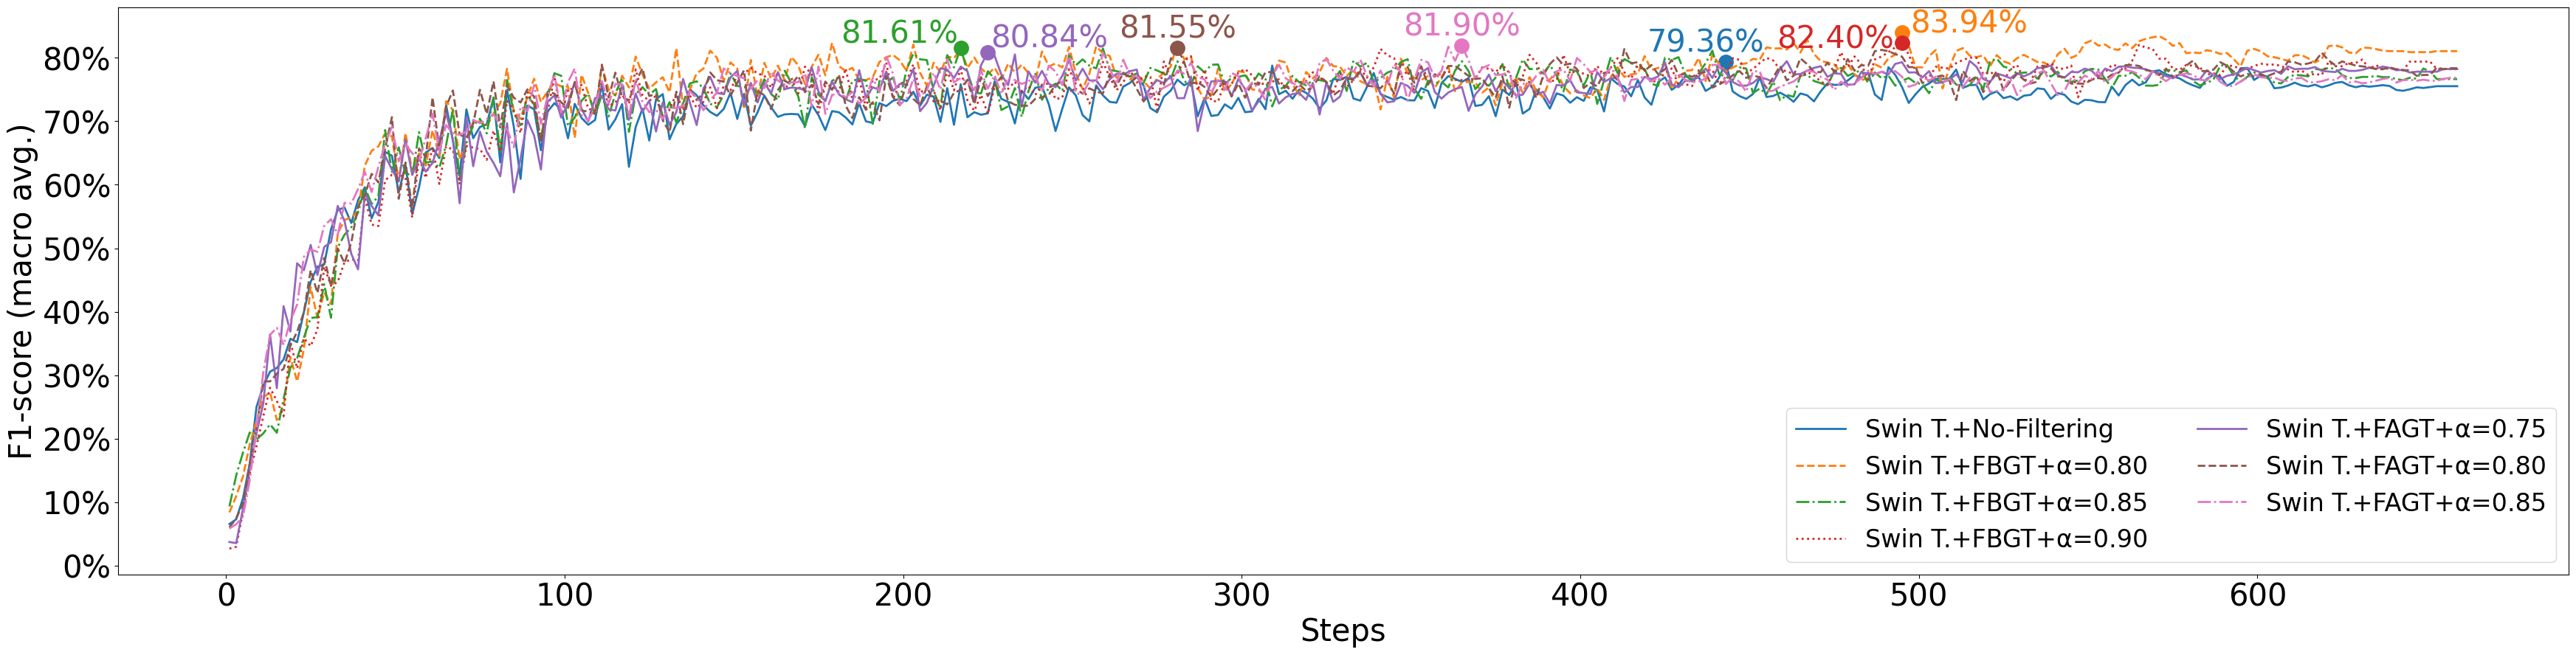

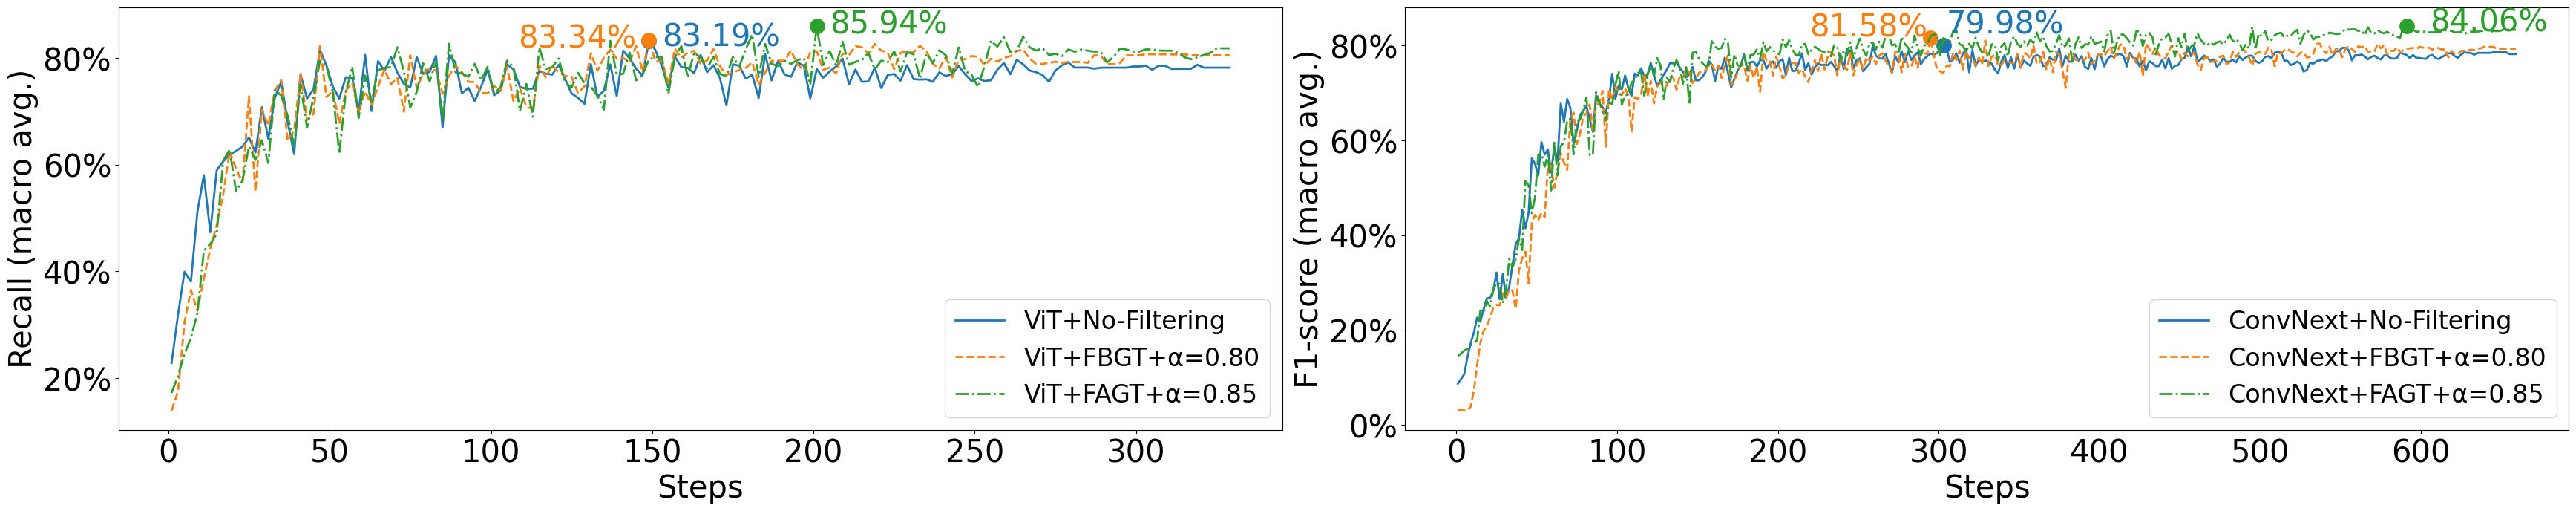

In [19]:
# Sample dataframes and plot labels
dataframes = [
    [df_st_model,
     df_st_model_FBGT_alpha_1,
     df_st_model_FBGT_alpha_2,
     df_st_model_FBGT_alpha_3,
     df_st_model_FAGT_alpha_1,
     df_st_model_FAGT_alpha_2,
     df_st_model_FAGT_alpha_3]
]

plot_labels = [
    ['Swin T.+No-Filtering', 
     'Swin T.+FBGT+α=0.80',
     'Swin T.+FBGT+α=0.85', 
     'Swin T.+FBGT+α=0.90', 
     'Swin T.+FAGT+α=0.75',
     'Swin T.+FAGT+α=0.80',
     'Swin T.+FAGT+α=0.85'
    ]
]

# Define custom colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']

# red dots
dots = [
    [[-20, 10],[65, 0],[-60, 5],[-65, -5],[60, 5],[0, 10],[0, 10]]
]

plt.figure(figsize=(35, 9))

for i, (df_row, label_row, dot_row) in enumerate(zip(dataframes, plot_labels, dots)):
    for j, (df, label, color, style, dot_pos) in enumerate(zip(df_row, label_row, colors, line_styles, dot_row)):
        x = df['F1-score'].index.values.tolist()
        y = df['F1-score'].values.tolist()
        y = np.array(y) * 100

        plt.plot(x, y, linestyle=style, color=color, linewidth=2, label=label)

        idx = np.argmax(y)
        x_max = x[idx]
        y_max = y[idx]

        plt.plot(x_max, y_max, marker='o', markersize=14, color=color)

        # Annotate the red dot with its value
        plt.annotate(f'{y_max:.2f}%', (x_max, y_max), textcoords="offset points", xytext=(dot_pos), ha='center', fontsize='30', color=color)

# Format y-axis as percentages for the entire plot
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))
        
plt.xlabel('Steps', fontsize='30')
plt.ylabel('F1-score (macro avg.)', fontsize='30')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(loc='lower right', fontsize='24', ncol=2)
plt.tight_layout()  
plt.savefig('../../plots/outputs/fig-ham10000-metric-g1.pdf', bbox_inches='tight')
plt.show()
        
# Sample dataframes and plot labels
dataframes = [
    [df_vit_model, df_vit_model_FBGT_alpha_1, df_vit_model_FAGT_alpha_3],
    [df_convnext_model, df_convnext_model_FBGT_alpha_1, df_convnext_model_FAGT_alpha_3]
]

plot_labels = [
    ['ViT+No-Filtering', 'ViT+FBGT+α=0.80', 'ViT+FAGT+α=0.85'],
    ['ConvNext+No-Filtering', 'ConvNext+FBGT+α=0.80', 'ConvNext+FAGT+α=0.85']
]

# Define custom colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = ['-', '--', '-.']

# Create subplots
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(35, 7))
axs = axs.ravel()

# red dots
dots = [
    [[70, -5],[-70, -7],[70, -7]],
    [[60, 12],[-60, 2],[80, -5]]
]

metrics = ['Recall', 'F1-score']

for i, (df_row, label_row, dot, metric) in enumerate(zip(dataframes, plot_labels, dots, metrics)):
    ax = axs[i]
    
    for j, (df, label, color, style, dot_pos) in enumerate(zip(df_row, label_row, colors, line_styles, dot)):
        x = df[metric].index.values.tolist()
        y = df[metric].values.tolist()
        y = np.array(y) * 100

        ax.plot(x, y, linestyle=style, color=color, linewidth=2, label=label)

        idx = np.argmax(y)
        x_max = x[idx]
        y_max = y[idx]
        
        ax.plot(x_max, y_max, marker='o', markersize=14, color=color)
        
        # Annotate the red dot with its value
        ax.annotate(f'{y_max:.2f}%', (x_max, y_max), textcoords="offset points", xytext=(dot_pos), ha='center', fontsize='30', color=color)

        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlabel('Steps', fontsize='30')
        ax.set_ylabel(f'{metric} (macro avg.)', fontsize='30')
        ax.legend(loc='lower right', fontsize='24')
        
        # Format y-axis as percentages
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))
        
# Adjust layout
plt.tight_layout()
plt.savefig('../../plots/outputs/fig-ham10000-metric-g2.pdf', bbox_inches='tight')
plt.show()

# F1-score (Macro Average)

In [20]:
print("Swin T. | F1-score | No-Filtering: ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_st, average='macro')*100))
print("")
print("Swin T. | F1-score | FBGT (α=0.80): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_st_FBGT_alpha_1, average='macro')*100))
print("Swin T. | F1-score | FBGT (α=0.85): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_st_FBGT_alpha_2, average='macro')*100))
print("Swin T. | F1-score | FBGT (α=0.90): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_st_FBGT_alpha_3, average='macro')*100))
print("")
print("Swin T. | F1-score | FAGT (α=0.75): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_st_FAGT_alpha_1, average='macro')*100))
print("Swin T. | F1-score | FAGT (α=0.80): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_st_FAGT_alpha_2, average='macro')*100))
print("Swin T. | F1-score | FAGT (α=0.85): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_st_FAGT_alpha_3, average='macro')*100))
print("")

print("ViT | F1-score | No-Filtering: ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_vit, average='macro')*100))
print("ViT | F1-score | FBGT (α=0.80): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_vit_FBGT_alpha_1, average='macro')*100))
print("ViT | F1-score | FAGT (α=0.85): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_vit_FAGT_alpha_3, average='macro')*100))
print("")

print("ConvNeXt | F1-score | No-Filtering: ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_convnext, average='macro')*100))
print("ConvNeXt | F1-score | FBGT (α=0.80): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_convnext_FBGT_alpha_1, average='macro')*100))
print("ConvNeXt | F1-score | FAGT (α=0.85): ", '{0:.2f}%'.format(f1_score(y_true_flat, y_pred_flat_convnext_FAGT_alpha_3, average='macro')*100))

Swin T. | F1-score | No-Filtering:  79.36%

Swin T. | F1-score | FBGT (α=0.80):  83.94%
Swin T. | F1-score | FBGT (α=0.85):  81.61%
Swin T. | F1-score | FBGT (α=0.90):  82.40%

Swin T. | F1-score | FAGT (α=0.75):  80.84%
Swin T. | F1-score | FAGT (α=0.80):  81.55%
Swin T. | F1-score | FAGT (α=0.85):  81.90%

ViT | F1-score | No-Filtering:  81.12%
ViT | F1-score | FBGT (α=0.80):  81.85%
ViT | F1-score | FAGT (α=0.85):  82.77%

ConvNeXt | F1-score | No-Filtering:  79.98%
ConvNeXt | F1-score | FBGT (α=0.80):  81.58%
ConvNeXt | F1-score | FAGT (α=0.85):  84.06%


# Accuracy

In [21]:
print("Swin T. | Accuracy | No-Filtering: ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_st)*100))
print("")
print("Swin T. | Accuracy| FBGT (α=0.80): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_st_FBGT_alpha_1)*100))
print("Swin T. | Accuracy | FBGT (α=0.85): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_st_FBGT_alpha_2)*100))
print("Swin T. | Accuracy | FBGT (α=0.90): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_st_FBGT_alpha_3)*100))
print("")
print("Swin T. | Accuracy | FAGT (α=0.75): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_st_FAGT_alpha_1)*100))
print("Swin T. | Accuracy | FAGT (α=0.80): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_st_FAGT_alpha_2)*100))
print("Swin T. | Accuracy | FAGT (α=0.85): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_st_FAGT_alpha_3)*100))
print("")

print("ViT | Accuracy | No-Filtering: ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_vit)*100))
print("ViT | Accuracy | FBGT (α=0.80): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_vit_FBGT_alpha_1)*100))
print("ViT | Accuracy | FAGT (α=0.85): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_vit_FAGT_alpha_3)*100))
print("")

print("ConvNeXt | Accuracy | No-Filtering: ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_convnext)*100))
print("ConvNeXt | Accuracy | FBGT (α=0.80): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_convnext_FBGT_alpha_1)*100))
print("ConvNeXt | Accuracy | FAGT (α=0.85): ", '{0:.2f}%'.format(accuracy_score(y_true_flat, y_pred_flat_convnext_FAGT_alpha_3)*100))

Swin T. | Accuracy | No-Filtering:  93.24%

Swin T. | Accuracy| FBGT (α=0.80):  94.08%
Swin T. | Accuracy | FBGT (α=0.85):  93.48%
Swin T. | Accuracy | FBGT (α=0.90):  93.84%

Swin T. | Accuracy | FAGT (α=0.75):  93.36%
Swin T. | Accuracy | FAGT (α=0.80):  93.72%
Swin T. | Accuracy | FAGT (α=0.85):  94.08%

ViT | Accuracy | No-Filtering:  91.79%
ViT | Accuracy | FBGT (α=0.80):  92.39%
ViT | Accuracy | FAGT (α=0.85):  93.00%

ConvNeXt | Accuracy | No-Filtering:  92.63%
ConvNeXt | Accuracy | FBGT (α=0.80):  93.60%
ConvNeXt | Accuracy | FAGT (α=0.85):  94.44%


# AUC (Average) 

In [22]:
print("Swin T. | AUC | No-Filtering: ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_st)*100))
print("")
print("Swin T. | AUC| FBGT (α=0.80): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_st_FBGT_alpha_1)*100))
print("Swin T. | AUC | FBGT (α=0.85): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_st_FBGT_alpha_2)*100))
print("Swin T. | AUC | FBGT (α=0.90): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_st_FBGT_alpha_3)*100))
print("")
print("Swin T. | AUC | FAGT (α=0.75): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_st_FAGT_alpha_1)*100))
print("Swin T. | AUC | FAGT (α=0.80): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_st_FAGT_alpha_2)*100))
print("Swin T. | AUC | FAGT (α=0.85): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_st_FAGT_alpha_3)*100))
print("")

print("ViT | AUC | No-Filtering: ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_vit)*100))
print("ViT | AUC | FBGT (α=0.80): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_vit_FBGT_alpha_1)*100))
print("ViT | AUC | FAGT (α=0.85): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_vit_FAGT_alpha_3)*100))
print("")

print("ConvNeXt | AUC | No-Filtering: ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_convnext)*100))
print("ConvNeXt | AUC | FBGT (α=0.80): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_convnext_FBGT_alpha_1)*100))
print("ConvNeXt | AUC | FAGT (α=0.85): ", '{0:.2f}%'.format(roc_auc_score(y_true, y_pred_convnext_FAGT_alpha_3)*100))

Swin T. | AUC | No-Filtering:  97.15%

Swin T. | AUC| FBGT (α=0.80):  98.03%
Swin T. | AUC | FBGT (α=0.85):  96.33%
Swin T. | AUC | FBGT (α=0.90):  97.44%

Swin T. | AUC | FAGT (α=0.75):  96.95%
Swin T. | AUC | FAGT (α=0.80):  97.17%
Swin T. | AUC | FAGT (α=0.85):  97.23%

ViT | AUC | No-Filtering:  96.95%
ViT | AUC | FBGT (α=0.80):  97.67%
ViT | AUC | FAGT (α=0.85):  98.27%

ConvNeXt | AUC | No-Filtering:  97.32%
ConvNeXt | AUC | FBGT (α=0.80):  97.65%
ConvNeXt | AUC | FAGT (α=0.85):  97.54%


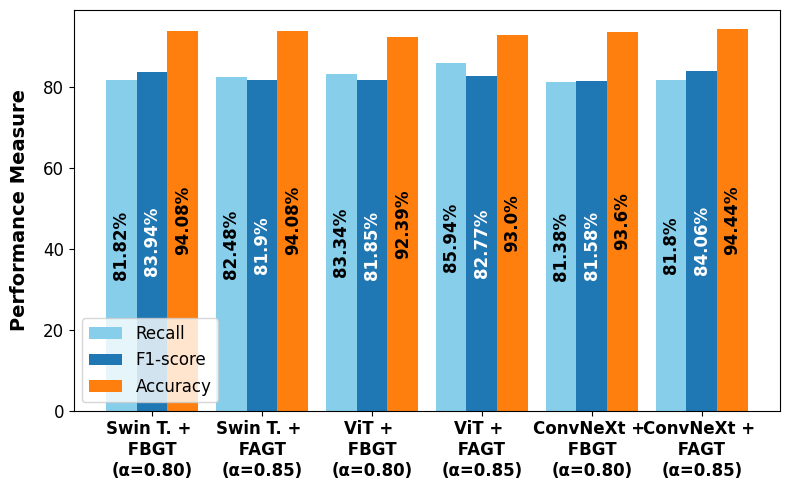

In [23]:
import numpy as np
import matplotlib.pyplot as plt

recall = [float('{0:.2f}'.format(recall_score(y_true_flat, y_pred_flat_st_FBGT_alpha_1, average='macro')*100)),
          float('{0:.2f}'.format(recall_score(y_true_flat, y_pred_flat_st_FAGT_alpha_3, average='macro')*100)),
          float('{0:.2f}'.format(recall_score(y_true_flat, y_pred_flat_vit_FBGT_alpha_1, average='macro')*100)),
          float('{0:.2f}'.format(recall_score(y_true_flat, y_pred_flat_vit_FAGT_alpha_3, average='macro')*100)),
          float('{0:.2f}'.format(recall_score(y_true_flat, y_pred_flat_convnext_FBGT_alpha_1, average='macro')*100)),
          float('{0:.2f}'.format(recall_score(y_true_flat, y_pred_flat_convnext_FAGT_alpha_3, average='macro')*100))]

f1 = [float('{0:.2f}'.format(f1_score(y_true_flat, y_pred_flat_st_FBGT_alpha_1, average='macro')*100)),
            float('{0:.2f}'.format(f1_score(y_true_flat, y_pred_flat_st_FAGT_alpha_3, average='macro')*100)),
            float('{0:.2f}'.format(f1_score(y_true_flat, y_pred_flat_vit_FBGT_alpha_1, average='macro')*100)),
            float('{0:.2f}'.format(f1_score(y_true_flat, y_pred_flat_vit_FAGT_alpha_3, average='macro')*100)),
            float('{0:.2f}'.format(f1_score(y_true_flat, y_pred_flat_convnext_FBGT_alpha_1, average='macro')*100)),
            float('{0:.2f}'.format(f1_score(y_true_flat, y_pred_flat_convnext_FAGT_alpha_3, average='macro')*100))]

accuracy = [float('{0:.2f}'.format(accuracy_score(y_true_flat, y_pred_flat_st_FBGT_alpha_1)*100)),
            float('{0:.2f}'.format(accuracy_score(y_true_flat, y_pred_flat_st_FAGT_alpha_3)*100)),
            float('{0:.2f}'.format(accuracy_score(y_true_flat, y_pred_flat_vit_FBGT_alpha_1)*100)),
            float('{0:.2f}'.format(accuracy_score(y_true_flat, y_pred_flat_vit_FAGT_alpha_3)*100)),
            float('{0:.2f}'.format(accuracy_score(y_true_flat, y_pred_flat_convnext_FBGT_alpha_1)*100)),
            float('{0:.2f}'.format(accuracy_score(y_true_flat, y_pred_flat_convnext_FAGT_alpha_3)*100))]

labels = ['Swin T. + \n FBGT \n(α=0.80)', 
          'Swin T. + \n FAGT \n(α=0.85)', 
          'ViT + \n FBGT \n(α=0.80)', 
          'ViT + \n FAGT \n(α=0.85)' ,
          'ConvNeXt + \n FBGT \n(α=0.80)',
          'ConvNeXt + \n FAGT \n(α=0.85)']  # Labels for the x-axis

# Calculate the width for each bar
bar_width = 0.28

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(recall))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust the figure size as desired

# Plot the recall bars
recall_bars = ax.bar(bar_positions, recall, bar_width, label='Recall', color='skyblue')

# Plot the f1-score bars
f1_score_bars = ax.bar(bar_positions + bar_width, f1, bar_width, label='F1-score')

# Plot the accuracy bars
accuracy_bars = ax.bar(bar_positions + 2 * bar_width, accuracy, bar_width, label='Accuracy')

# Set labels and title
ax.set_ylabel('Performance Measure', fontsize=14, labelpad=10, weight='bold')  # Increase the font size of y-label

ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(labels, fontsize=12, weight='bold', ha='center')  # Increase the font size of x-tick labels
ax.yaxis.set_tick_params(labelsize=12)  # Increase the font size of y-tick labels

# Add value labels on top of each bar
for bar in recall_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height}%', ha='center', va='center', fontsize=12, weight='bold', color='black', rotation=90)  

for bar in f1_score_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height}%', ha='center', va='center', fontsize=12, weight='bold', color='white', rotation=90) 
    
for bar in accuracy_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height}%', ha='center', va='center', fontsize=12, weight='bold', color='black', rotation=90) 

# Add legend
ax.legend(fontsize=12, loc="lower left",)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent labels from getting cut off
plt.show()

# fig = ax.get_figure()
# fig.savefig('../../plots/outputs/fig-ham10000-analysis.pdf', bbox_inches='tight')

# Confusion Matrix

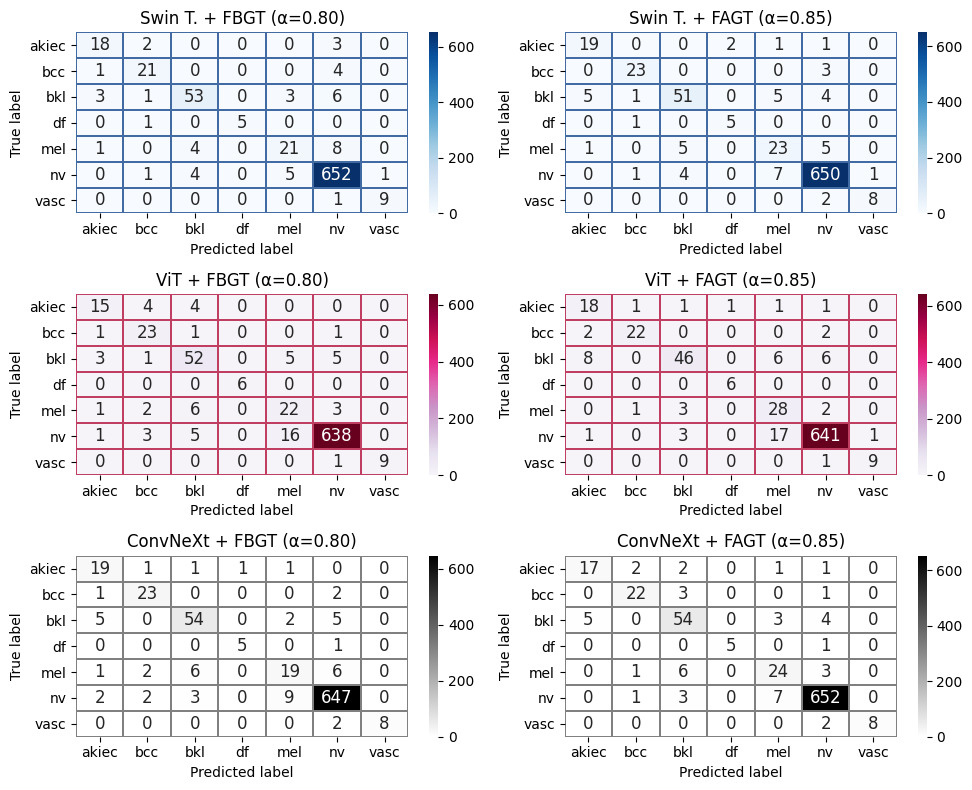

In [24]:
y_preds_flat = [
    y_pred_flat_st_FBGT_alpha_1, 
    y_pred_flat_st_FAGT_alpha_3, 
    y_pred_flat_vit_FBGT_alpha_1, 
    y_pred_flat_vit_FAGT_alpha_3,
    y_pred_flat_convnext_FBGT_alpha_1,
    y_pred_flat_convnext_FAGT_alpha_3
]

titles = [
    'Swin T. + FBGT (α=0.80)',
    'Swin T. + FAGT (α=0.85)',
    'ViT + FBGT (α=0.80)',
    'ViT + FAGT (α=0.85)',
    'ConvNeXt + FBGT (α=0.80)',
    'ConvNeXt + FAGT (α=0.85)'
] 

cmap = ['Blues', 'Blues', 'PuRd', 'PuRd', 'binary', 'binary']

linecolor = [
    (67/255, 107/255, 163/255),
    (67/255, 107/255, 163/255),
    (191/255, 62/255, 98/255),
    (191/255, 62/255, 98/255),
    'gray',
    'gray'
]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
axs = axs.flatten()

# Indices of subplots where confusion matrices should be placed
cm_indices = [0, 1, 2, 3, 4, 5]


for i, cm_idx in enumerate(cm_indices):
    cnf_matrix = confusion_matrix(y_true_flat, y_preds_flat[i])
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
    labels = [f"{v1}" for v1 in group_counts]
    matrix_labels = np.asarray(labels).reshape(7,7)
    axis_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
    sns.heatmap(
        cnf_matrix, 
        annot=matrix_labels, 
        fmt='',  
        cmap=cmap[i], 
        linewidths=0.1, 
        linecolor=linecolor[i],
        xticklabels=axis_labels, 
        yticklabels=axis_labels,
        ax=axs[cm_idx],
        annot_kws={"fontsize":12},
    )
    axs[cm_idx].set(xlabel='Predicted label', ylabel='True label', title=f'{titles[i]}')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()